In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv(r"C:\Users\Pratham Sankhala\Desktop\train.csv").rename(columns={'sms':'text'})
df

,text,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


In [8]:
df.head()

,text,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
red_palette = sns.color_palette("Reds_r", 2)
red_palette_c = sns.color_palette("Reds_r", as_cmap=True)

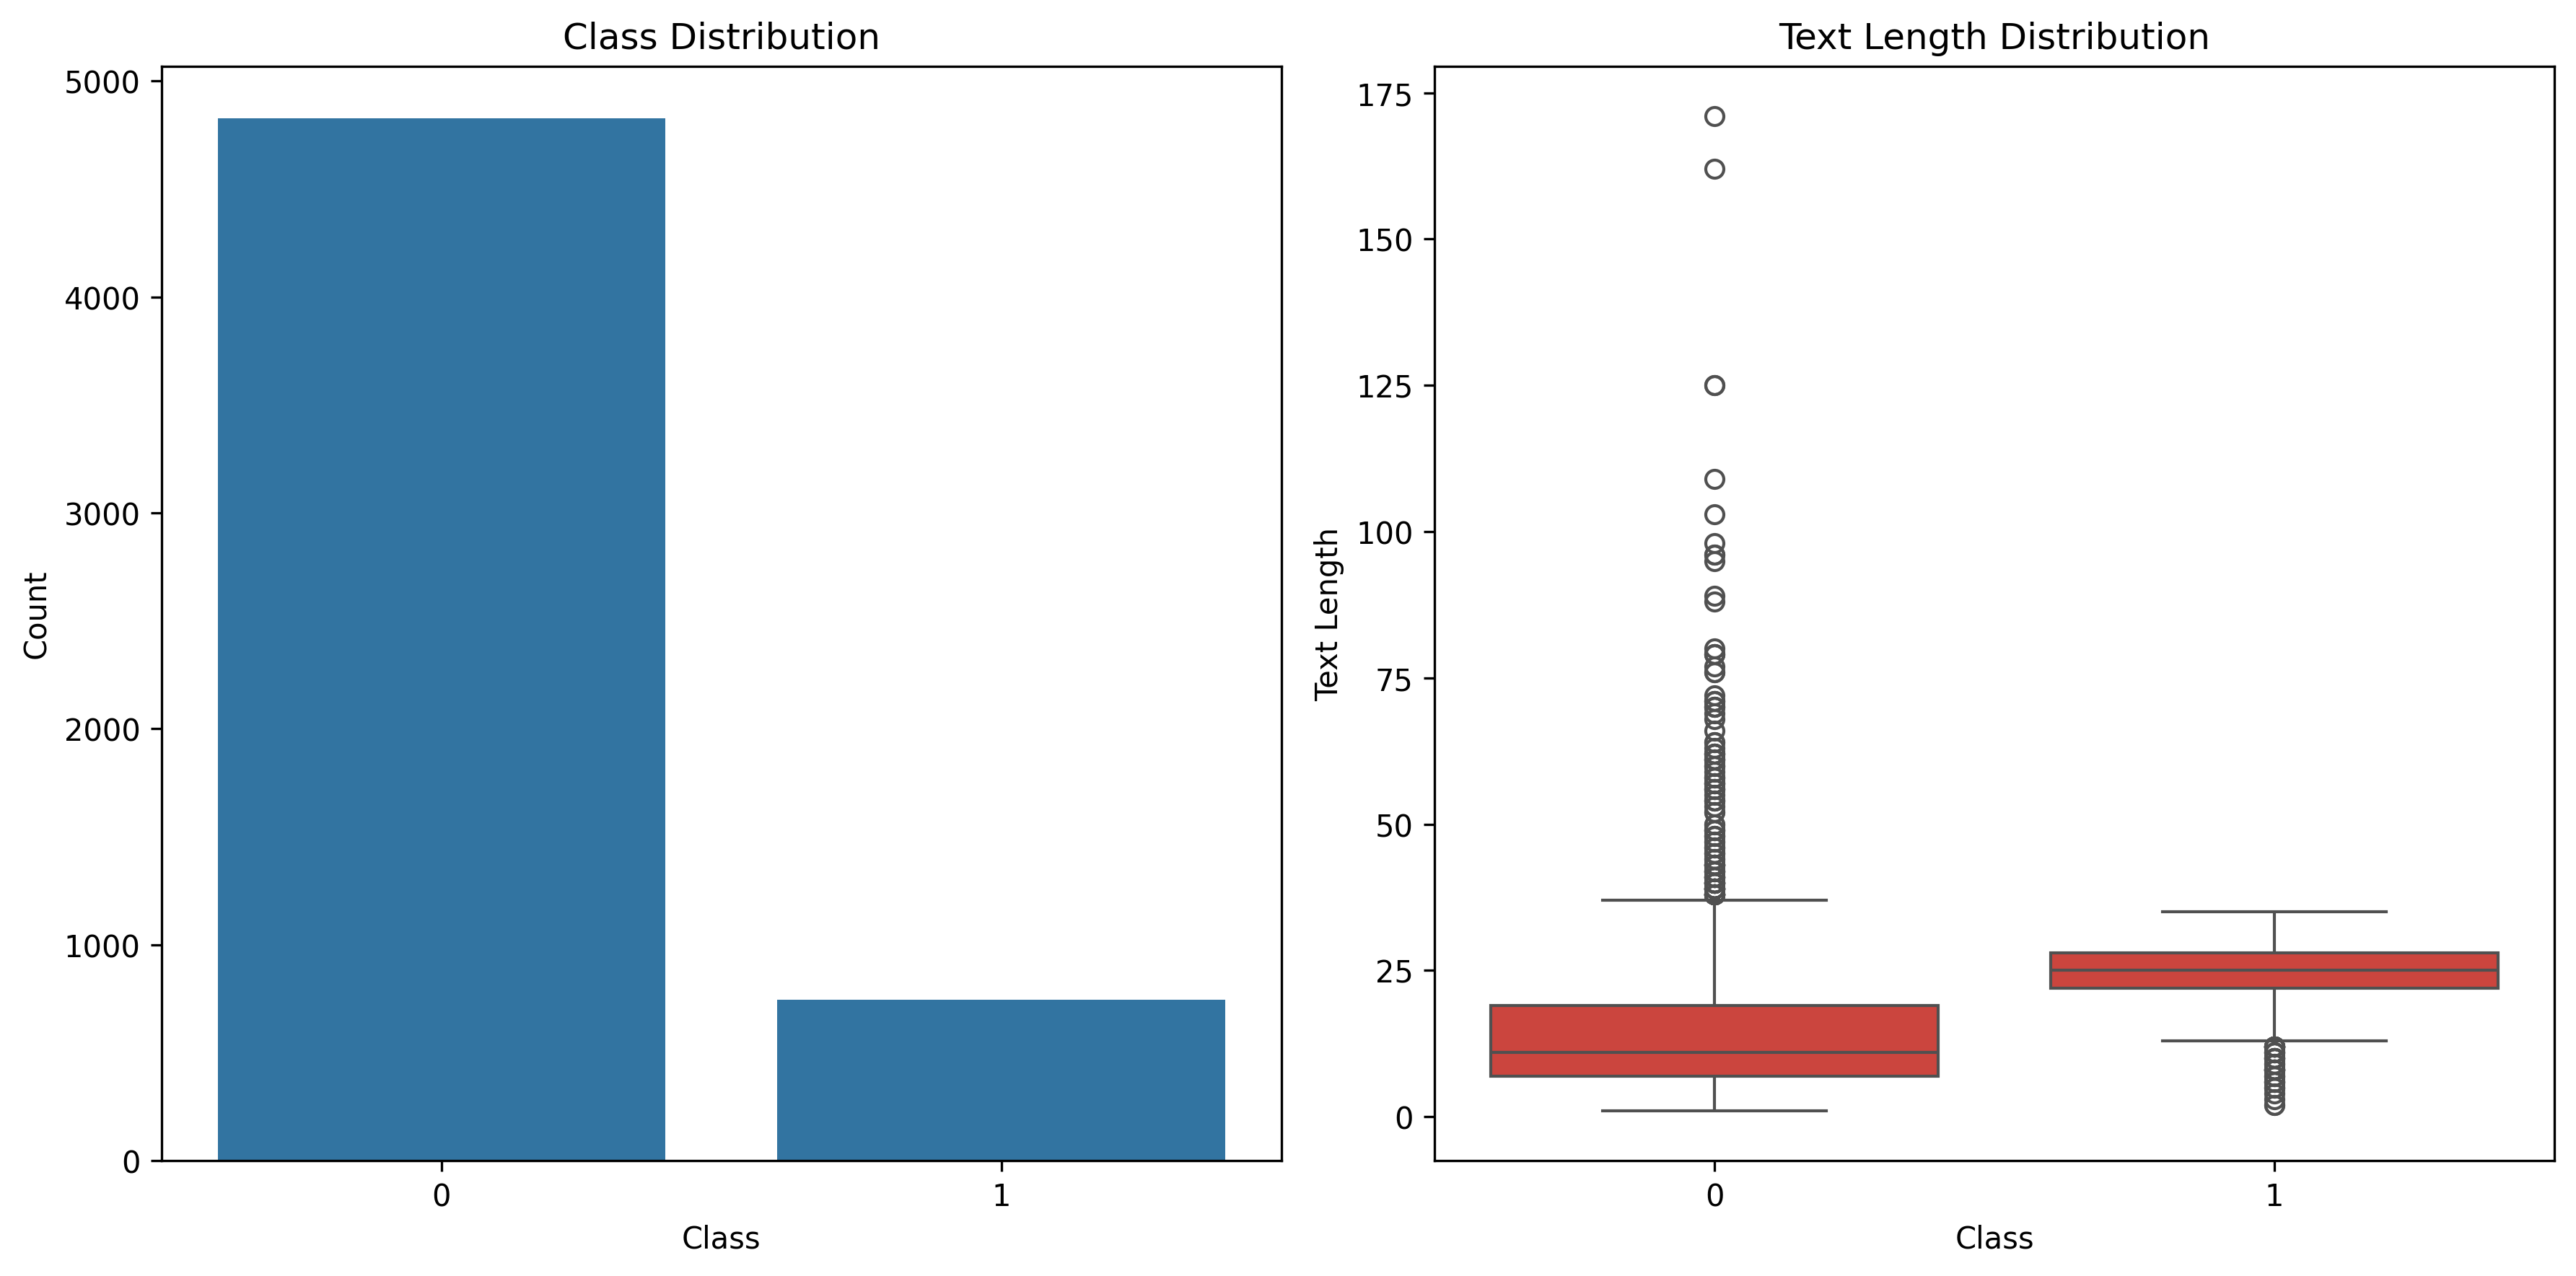

In [13]:
plt.figure(figsize=(12, 6), dpi=300)
plt.subplot(1, 2, 1)
sns.set_palette(red_palette)
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.set_palette(red_palette)
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
sns.boxplot(x='label', y='text_length', data=df)
plt.title('Text Length Distribution')
plt.xlabel('Class')
plt.ylabel('Text Length')
plt.tight_layout()
plt.show()

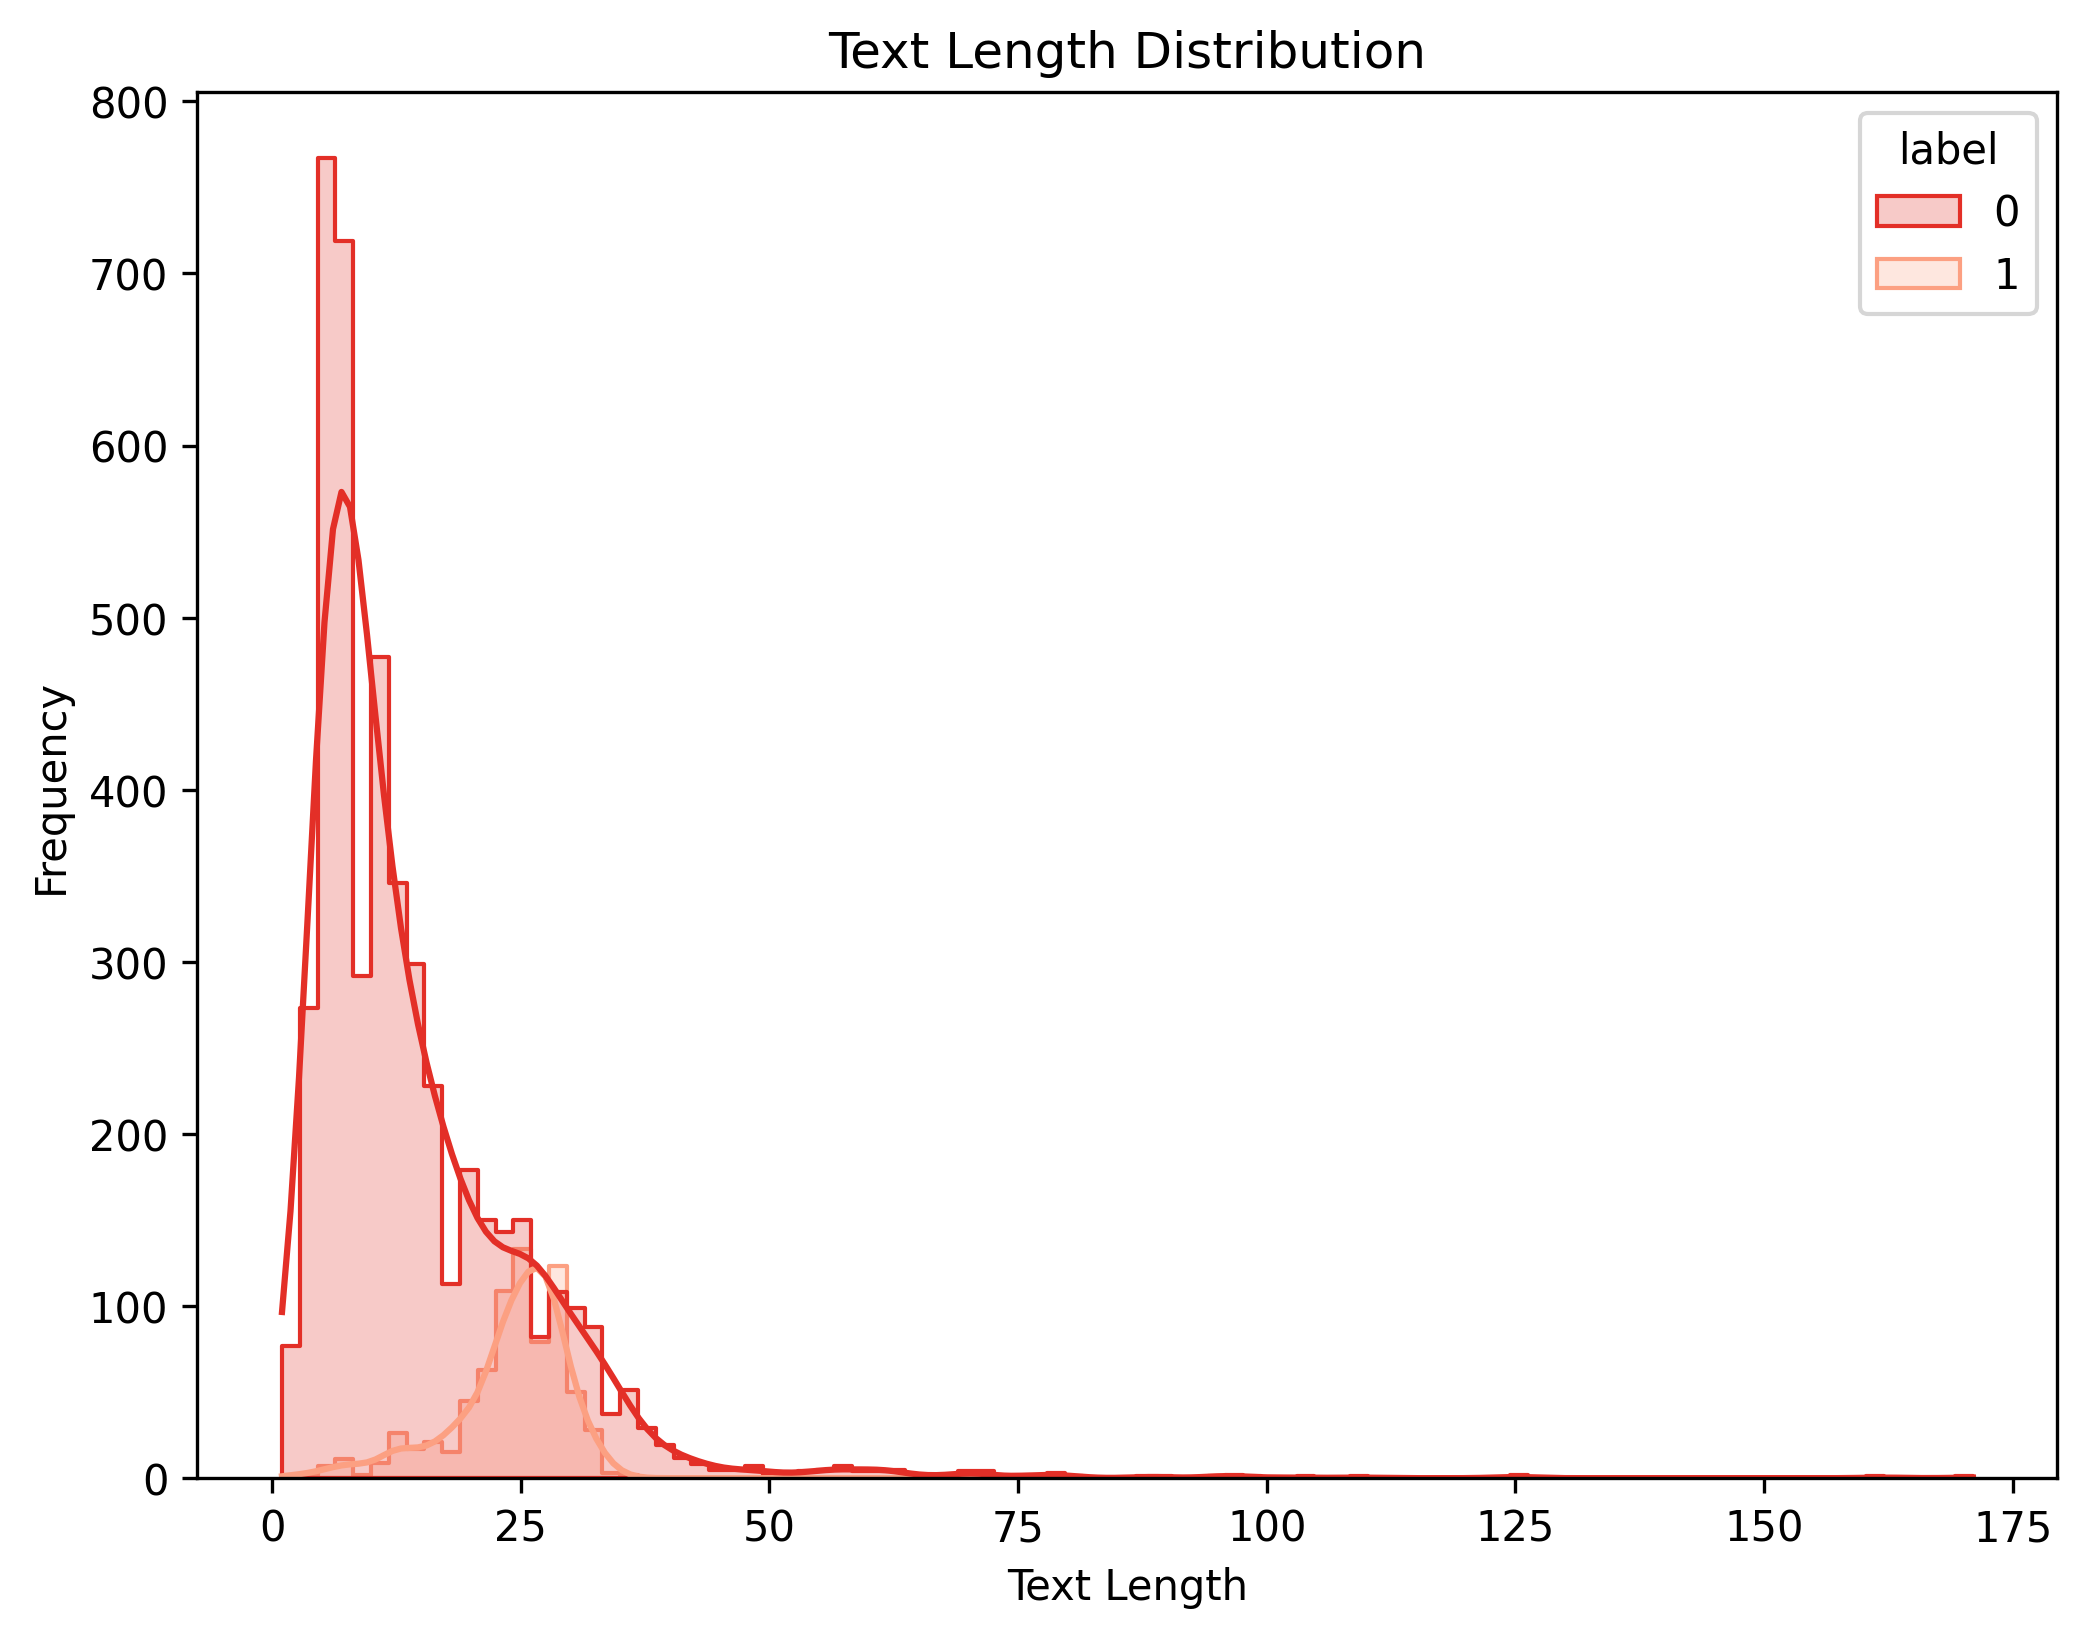

In [14]:
plt.figure(figsize=(8, 6), dpi=300)
sns.set_palette(red_palette)
sns.histplot(data=df, x='text_length', hue='label', kde=True, element='step')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [40]:
def preprocess_text(text):
    words = word_tokenize(text) 
    words = [word.lower() for word in words if word.isalnum()] 
    words = [word for word in words if word not in stopwords.words("english")]
    return " ".join(words) 

In [41]:
df['text'] = df['text'].apply(preprocess_text)

In [42]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
X = tfidf_vectorizer.fit_transform(df['text']).toarray()
y = df['label']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
sklearn_classifier = MultinomialNB(alpha=0.1)
sklearn_classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [50]:
class SklearnNLTKClassifier(nltk.classify.ClassifierI): 
    def __init__(self, classifier):
        self._classifier = classifier
    
    def classify(self, features):
        return self._classifier.predict([features])[0]
    
    def classify_many(self, featuresets): 
        return self._classifier.predict(featuresets)
    
    def prob_classify(self, features): 
        raise NotImplementedError("Probability estimation not available.")
    
    def labels(self): 
        return self._classifier.classes_

In [51]:
nltk_classifier = SklearnNLTKClassifier(sklearn_classifier)

In [56]:
y_pred = nltk_classifier.classify_many(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
acc = f"Accuracy is : {accuracy:0.2f}"

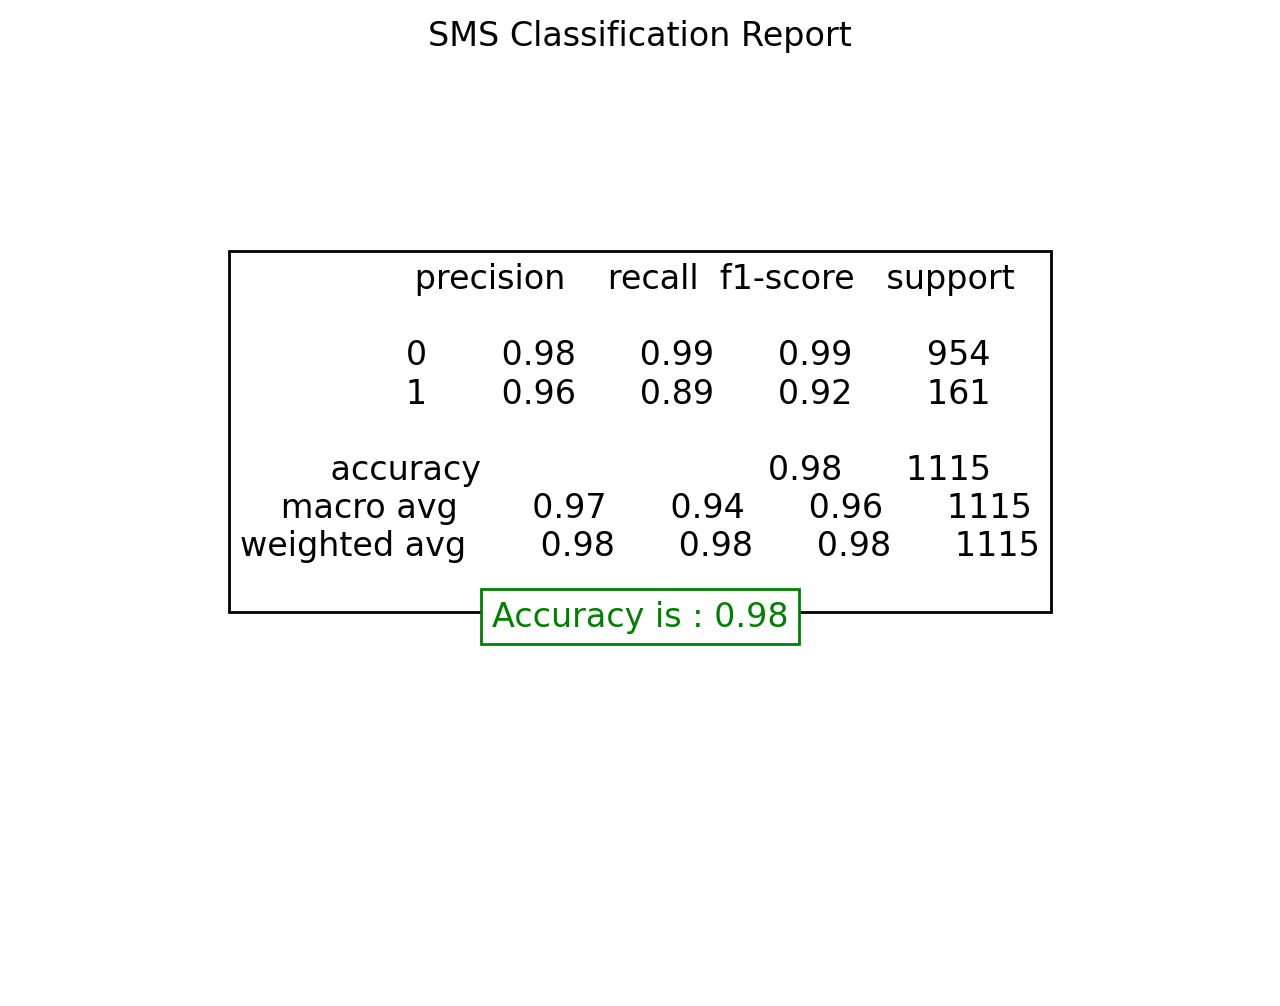

In [57]:
plt.figure(figsize=(8, 6), dpi=200)
plt.text(0.5, 0.6, report, fontsize=12, color='black', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black'))
plt.text(0.5, 0.4, acc, fontsize=12, color='Green', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='green'))
plt.title('SMS Classification Report')
plt.axis('off')
plt.show()